In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
pattern1 = r"Pos Grad Mean: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Cnt:(\d*)"
pattern2 = r"Neg Grad Mean: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Cnt:(\d*)"
pattern3 = r"Pos Mean Logit: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Pred: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern4 = r"Neg Mean Logit: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Pred: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern5 = r"Loss: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"

# For JRC
pattern6 = r"Pos Click Grad Mean: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Cnt:(\d*)"
pattern7 = r"Pos Non-Click Grad Mean: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Cnt:(\d*)"
pattern8 = r"Neg Click Grad Mean: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Cnt:(\d*)"
pattern9 = r"Neg Non-Click Grad Mean: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Cnt:(\d*)"
pattern10 = r"A: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern11 = r"Grad Fac: (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"
pattern12 = r"Grad Fac: Correct (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), Incorrect (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?), (-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)"

In [2]:
def mv_step(arr, step, window):
    ret = []
    for i in range(0,len(arr),step):
        if i ==0: continue
        else:
            ret.append(np.mean(arr[i-window+1: i+1]))
    return ret

In [3]:
def parse_log(curr_name,path, only_for_neg_grad=False):
    
    with open(path,'r') as f:
        logs = f.readlines()
    
    pos_grad, neg_grad = [], []
    pos_cnt, neg_cnt = [], []
    pos_logit, pos_pred = [], []
    neg_logit, neg_pred = [], []
    pos_click_logit, pos_non_click_logit, neg_click_logit, neg_non_click_logit  = [], [], [], []
    A_min, A_mean, A_max = [], [], []
    loss = []
    grad_fac_min, grad_fac_mean, grad_fac_max = [], [], []
    correct_fac, correct_num, incorrect_fac, incorrect_num = [], [], [], []
    for line in logs:
        match2 = re.search(pattern2, line)
        if match2:
            neg_grad.append(float(match2.group(1)))
            neg_cnt.append(int(match2.group(2)))
        if only_for_neg_grad:
            continue
        match1 = re.search(pattern1, line)
        match3 = re.search(pattern3, line)
        match4 = re.search(pattern4, line)
        match5 = re.search(pattern5, line)
        match6 = re.search(pattern6, line)
        match7 = re.search(pattern7, line)
        match8 = re.search(pattern8, line)
        match9 = re.search(pattern9, line)
        match10 = re.search(pattern10, line)
        match11 = re.search(pattern11, line)
        match12 = re.search(pattern12, line)
        if match1:
            pos_grad.append(float(match1.group(1)))
            pos_cnt.append(int(match1.group(2)))

        if match3:
            pos_logit.append(float(match3.group(1)))
            pos_pred.append(float(match3.group(2)))
        if match4:
            neg_logit.append(float(match4.group(1)))
            neg_pred.append(float(match4.group(2)))
        if match5:
            loss.append(float(match5.group(1)))
        if match6:
            pos_click_logit.append(float(match6.group(1)))
        if match7:
            pos_non_click_logit.append(float(match7.group(1)))
        if match8:
            neg_click_logit.append(float(match8.group(1)))
        if match9:
            neg_non_click_logit.append(float(match9.group(1)))
        if match10:
            A_min.append(float(match10.group(1)))
            A_mean.append(float(match10.group(2)))
            A_max.append(float(match10.group(3)))
            
        if match11:
            grad_fac_min.append(float(match11.group(1)))
            grad_fac_mean.append(float(match11.group(2)))
            grad_fac_max.append(float(match11.group(3)))
        if match12:
            correct_fac.append(float(match12.group(1)))
            correct_num.append(float(match12.group(2)))
            incorrect_fac.append(float(match12.group(3)))
            incorrect_num.append(float(match12.group(4)))     
    return {
        'name':curr_name,
        'pos_grad': pos_grad,
        'neg_grad': neg_grad,
        'pos_cnt': pos_cnt,
        'neg_cnt': neg_cnt,
        'pos_logit': pos_logit,
        'pos_pred': pos_pred,
        'neg_logit': neg_logit,
        'neg_pred': neg_pred,
        'loss': loss,
        'pos_click_grad':pos_click_logit,
        'pos_non_click_grad':pos_non_click_logit,
        'neg_click_grad':neg_click_logit,
        'neg_non_click_grad':neg_non_click_logit,
    }


In [5]:
ret_dict2 = parse_log('bce','../../Criteo/DCNv2_criteo_x1/criteo_x1/bce_posw0.1_grad_first_epoch.log')
ret_dict4 = parse_log('jrc','../../Criteo/DCNv2_criteo_x1/criteo_x1/jrc_posw0.1_grad_first_epoch.log')
ret_dict5 = parse_log('combined-pair','../../Criteo/DCNv2_criteo_x1/criteo_x1/combined_pair_posw0.1_grad_first_epoch.log')
ret_dict6 = parse_log('combined-list','../../Criteo/DCNv2_criteo_x1/criteo_x1/combined_list_posw0.1_grad_first_epoch.log')
ret_dict7 = parse_log('listce','../../Criteo/DCNv2_criteo_x1/criteo_x1/listce_posw0.1_grad_first_epoch.log')


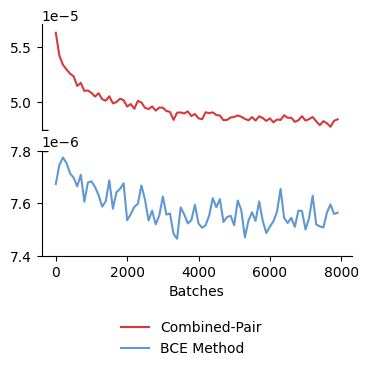

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 3))

twitter_color = '#D9383A'
base_color = '#5F98D2'
jrc_color='#96C37D'
combined_list_color = 'y'
listce_color = 'purple'

right = 8000
step = 100
start = 0
x = np.arange(start, right, step)

line1 = ax1.plot(x, mv_step(ret_dict5['neg_grad'], window=50, step=step), label='Combined-Pair', ls='solid', color=twitter_color)
line2 = ax2.plot(x, mv_step(ret_dict2['neg_grad'], window=50, step=step), label='BCE Method', ls='solid', color=base_color)

ax2.set_xlabel("Batches")
ax1.set_ylim(4.75e-5, 5.7e-5)
ax2.set_ylim(7.4e-6, 7.8e-6)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.2)
kwargs = dict(marker=[(-1, 0), (1, 0)],
              markersize=8,
              linestyle='none', color='k', mec='k', mew=1., clip_on=True)
ax1.plot([0], [0], transform=ax1.transAxes, **kwargs)
ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)


ax1.ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)
ax2.ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)

# 合并所有线的图例
lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, frameon=False, bbox_to_anchor=(0.75,-1.7))
ax1.get_xaxis().set_visible(False)
plt.savefig('../../../../figure/neg_grad_dual_0.pdf', dpi=450, bbox_inches='tight')
plt.show()


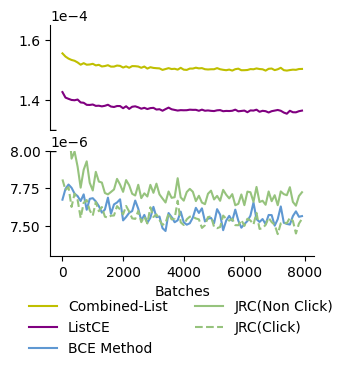

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(3.4, 3))

right = 8000
step = 100
start = 0
x = np.arange(start, right, step)

line11 = ax1.plot(x, mv_step(ret_dict6['neg_grad'], window=50, step=step), label='Combined-List', ls='solid', color=combined_list_color)
line12 = ax1.plot(x, mv_step(ret_dict7['neg_grad'], window=50, step=step), label='ListCE', ls='solid', color=listce_color)
line2 = ax2.plot(x, mv_step(ret_dict2['neg_grad'], window=50, step=step), label='BCE Method', ls='solid', color=base_color)
line3 = ax2.plot(x, mv_step(ret_dict4['neg_non_click_grad'], window=50, step=step), label='JRC(Non Click)', ls='solid', color=jrc_color)
line4 = ax2.plot(x, mv_step(ret_dict4['neg_click_grad'], window=50, step=step), label='JRC(Click)', ls='dashed', color=jrc_color)
ax2.set_xlabel("Batches")
ax1.set_ylim(13e-5, 16.5e-5)
ax2.set_ylim(7.3e-6, 8e-6)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.2)
kwargs = dict(marker=[(-1, 0), (1, 0)],
              markersize=8,
              linestyle='none', color='k', mec='k', mew=1., clip_on=True)
ax1.plot([0], [0], transform=ax1.transAxes, **kwargs)
ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)


ax1.ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)
ax2.ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)

lines = line11 + line12 + line2 + line3 + line4
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, ncol=2,frameon=False,bbox_to_anchor=(1.12,-0.3))
ax1.get_xaxis().set_visible(False)
plt.savefig('../../../../figure/neg_grad_dual_1.pdf', dpi=450, bbox_inches='tight')
plt.show()


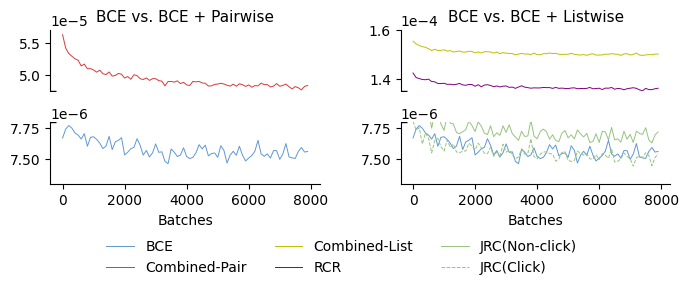

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize=(8, 2))

twitter_color = '#D9383A'
base_color = '#5F98D2'
jrc_color='#96C37D'
combined_list_color = 'y'
listce_color = 'purple'
linewidth = 0.7

right = 8000
step = 100
start = 0
x = np.arange(start, right, step)

line1 = ax1[0].plot(x, mv_step(ret_dict5['neg_grad'], window=50, step=step), label='Combined-Pair', ls='solid', color=twitter_color,linewidth=linewidth)
line2 = ax2[0].plot(x, mv_step(ret_dict2['neg_grad'], window=50, step=step), label='BCE', ls='solid', color=base_color,linewidth=linewidth)

ax1[0].set_title(r"BCE vs. BCE + Pairwise",fontdict={'size':11})
ax2[0].set_xlabel("Batches")
ax1[0].set_ylim(4.75e-5, 5.7e-5)
ax2[0].set_ylim(7.3e-6, 7.8e-6)
ax1[0].xaxis.tick_top()
ax1[0].tick_params(labeltop=False)
ax2[0].xaxis.tick_bottom()
ax1[0].spines['bottom'].set_visible(False)
ax2[0].spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.2)
kwargs = dict(marker=[(-1, 0), (1, 0)],
              markersize=8,
              linestyle='none', color='k', mec='k', mew=1., clip_on=True)
ax1[0].plot([0], [0], transform=ax1[0].transAxes, **kwargs)
ax2[0].plot([0], [1], transform=ax2[0].transAxes, **kwargs)

ax1[0].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)
ax2[0].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)

ax1[0].get_xaxis().set_visible(False)

#---------------------------------------
line11 = ax1[1].plot(x, mv_step(ret_dict6['neg_grad'], window=50, step=step), label='Combined-List', ls='solid', color=combined_list_color,linewidth=linewidth)
line12 = ax1[1].plot(x, mv_step(ret_dict7['neg_grad'], window=50, step=step), label='RCR', ls='solid', color=listce_color,linewidth=linewidth)
line22 = ax2[1].plot(x, mv_step(ret_dict2['neg_grad'], window=50, step=step), label='BCE', ls='solid', color=base_color,linewidth=linewidth)
line3 = ax2[1].plot(x, mv_step(ret_dict4['neg_non_click_grad'], window=50, step=step), label='JRC(Non-click)', ls='solid', color=jrc_color,linewidth=linewidth)
line4 = ax2[1].plot(x, mv_step(ret_dict4['neg_click_grad'], window=50, step=step), label='JRC(Click)', ls='dashed', color=jrc_color,linewidth=linewidth)
ax1[1].set_title(r"BCE vs. BCE + Listwise",fontdict={'size':11})
ax2[1].set_xlabel("Batches")
ax1[1].set_ylim(13.5e-5, 16e-5)
ax2[1].set_ylim(7.3e-6, 7.8e-6)
ax1[1].tick_params(labeltop=False) 
ax1[1].spines['bottom'].set_visible(False) 
ax2[1].spines['top'].set_visible(False) 
plt.subplots_adjust(hspace=0.2)
kwargs = dict(marker=[(-1, 0), (1, 0)],
              markersize=8,
              linestyle='none', color='k', mec='k', mew=1., clip_on=True)
ax1[1].plot([0], [0], transform=ax1[1].transAxes, **kwargs)
ax2[1].plot([0], [1], transform=ax2[1].transAxes, **kwargs)

ax1[1].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)
ax2[1].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y', useOffset=False)
# ax1[0].set_yticks(size=14)
# 合并所有线的图例
lines = line2+ line1+line11 + line12 + line3 + line4
labels = [line.get_label() for line in lines]
ax1[1].get_xaxis().set_visible(False)

ax1[0].spines['top'].set_visible(False)
ax1[0].spines['right'].set_visible(False)
ax1[1].spines['top'].set_visible(False)
ax1[1].spines['right'].set_visible(False)
ax2[0].spines['top'].set_visible(False)
ax2[0].spines['right'].set_visible(False)
ax2[1].spines['top'].set_visible(False)
ax2[1].spines['right'].set_visible(False)
plt.legend(lines, labels, bbox_to_anchor=(0.7,-0.7),frameon=False,ncols=3)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
plt.savefig('../../../../figure/neg_grad_dual.pdf', dpi=450, bbox_inches='tight')
plt.show()


In [9]:
with open('../tmp_res/focal_log.npy', 'rb') as f:
    focal_logs_names = np.load(f,allow_pickle=True)

In [10]:
base_path = '../../../../Criteo/DCNv2_criteo_x1_posw0.1_focal_gamma_tuner1/criteo_x1/'
focal_loss_ret_dict = [
    parse_log(gamma,base_path+name+'.log', only_for_neg_grad=True) for name, gamma in tqdm(focal_logs_names)
]

100%|██████████| 12/12 [00:08<00:00,  1.36it/s]


In [11]:
len(focal_loss_ret_dict[0]['neg_grad'])

177276

In [12]:
right = 8000
step = 100
start = 0

res_dict = {'BCE':ret_dict2['neg_grad'][:right]}
res_dict.update({parsed_log['name']:parsed_log['neg_grad'][:right] for parsed_log in focal_loss_ret_dict})
focal_df = pd.DataFrame(res_dict)

In [13]:
focal_df

,BCE,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,7.0,8.0,9.0
0,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124,0.000124
1,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113
2,0.000101,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000101,0.000101,0.000101
3,0.000088,0.000090,0.000090,0.000090,0.000089,0.000089,0.000089,0.000089,0.000088,0.000088,0.000088,0.000088,0.000088
4,0.000069,0.000072,0.000072,0.000072,0.000071,0.000071,0.000070,0.000070,0.000069,0.000069,0.000069,0.000069,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000008,0.000009,0.000009,0.000009,0.000009,0.000009,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
7996,0.000008,0.000009,0.000009,0.000009,0.000009,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
7997,0.000007,0.000008,0.000008,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
7998,0.000008,0.000008,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000010,0.000010,0.000010,0.000010


In [14]:
focal_results = pd.read_csv('../tmp_res/gamma_results.csv')[['gamma','wAUC']]
pure_bce_results = pd.read_csv('../tmp_res/pure_BCE.csv')[['pos_weight','wAUC']]

BCE_auc = pure_bce_results[pure_bce_results.pos_weight==0.1].wAUC.values[0]
focal_results.loc[-1]=['BCE',BCE_auc]
focal_results =focal_results.sort_index().reset_index(drop=True)
focal_results

,gamma,wAUC
0,BCE,0.813210
1,1.0,0.813401
2,1.5,0.813592
3,2.0,0.813526
4,2.5,0.813643
5,3.0,0.813671
6,3.5,0.813683
7,4.0,0.813656
8,5.0,0.813771
9,6.0,0.813812


In [15]:
focal_color='#C82423'
color_palette = {name:focal_color if name !='BCE' else '#2878B5' for name in focal_df.columns}

In [16]:
len(focal_df.columns),len(focal_results['wAUC'])

(13, 13)

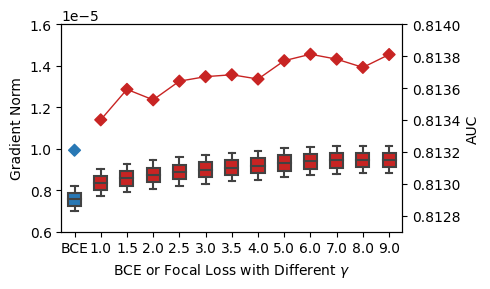

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(5, 3))

# Duplicate the axes with a different y-axis for ax2
ax2 = ax1.twinx()

# Plot data for ax1 (main y-axis)
ax1.set_xlabel(r'BCE or Focal Loss with Different $\gamma$')
ax1.set_ylabel('Gradient Norm')
sns.boxplot(data=focal_df, palette=color_palette, ax=ax1, fliersize=0, width=0.5, saturation=1, whis=[10, 90])
ax1.tick_params(axis='y')
ax1.set_ylim(6e-6, 1.6e-5)

# Plot data for ax2 (secondary y-axis)
ax2.set_ylabel('AUC')
ax2.scatter(focal_results.gamma.astype(str), focal_results['wAUC'], c=list(color_palette.values()), marker='D', linewidth=1)
ax2.plot(focal_results.gamma[1:].astype(str), focal_results['wAUC'][1:], color=focal_color, linewidth=1)
ax2.tick_params(axis='y')
ax2.set_ylim(0.8127, 0.814)

# Adjust layout and display the plot
plt.tight_layout()
# plt.show()
plt.savefig('../../../../figure/focal.pdf',dpi=450, bbox_inches='tight')